In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import cm


import functions

In [32]:
folder = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/output/1july_hydro/'

glmelt1 =pd.read_csv(folder + 'mustang_monthly_sum_elevation_glacier_melt_1landcover_mm.csv')
glmelt2 =pd.read_csv(folder + 'mustang_monthly_sum_elevation_glacier_melt_2landcover_mm.csv')
glmelt3 =pd.read_csv(folder + 'mustang_monthly_sum_elevation_glacier_melt_3landcover_mm.csv')



In [33]:
def prepare_for_plot(df, landcover, variable):
    df = df.drop('folder', axis = 1)
    melted = pd.melt(df, id_vars=['year', 'month'], var_name='elevation', value_name='value')
    
    melted['elevation'] = melted['elevation'].astype(str).str.extract(r'^(\d+)')[0].astype(int)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    melted['date_id'] = melted['year'].astype(str) + "_" + melted['month'].astype(str) + "_" + melted['elevation'].astype(str)
    melted = melted.sort_values('date_id')
    melted['landcover'] = landcover
    melted['variable'] = variable
    return melted 


In [34]:
glmelt1 = prepare_for_plot(glmelt1, 'landcover 1', 'glmelt')
glmelt2 = prepare_for_plot(glmelt2, 'landcover 2', 'glmelt')
glmelt3 = prepare_for_plot(glmelt3, 'landcover 3', 'glmelt')

In [35]:
glmelt3

,year,month,elevation,value,elevation_bin,date_id,landcover,variable
398,1989,10,2546,74.859682,2500 - 3000,1989_10_2546,landcover 3,glmelt
1192,1989,10,2571,73.616268,2500 - 3000,1989_10_2571,landcover 3,glmelt
5162,1989,10,2779,66.389011,2500 - 3000,1989_10_2779,landcover 3,glmelt
1589,1989,10,2886,65.059375,2500 - 3000,1989_10_2886,landcover 3,glmelt
14690,1989,10,2981,56.494444,2500 - 3000,1989_10_2981,landcover 3,glmelt
...,...,...,...,...,...,...,...,...
32553,2022,9,5895,0.000000,5500 - 6000,2022_9_5895,landcover 3,glmelt
69077,2022,9,5908,2.538833,5500 - 6000,2022_9_5908,landcover 3,glmelt
69871,2022,9,5909,2.508027,5500 - 6000,2022_9_5909,landcover 3,glmelt
33744,2022,9,5960,0.000000,5500 - 6000,2022_9_5960,landcover 3,glmelt


<AxesSubplot:label='c', xlabel='month', ylabel='value'>

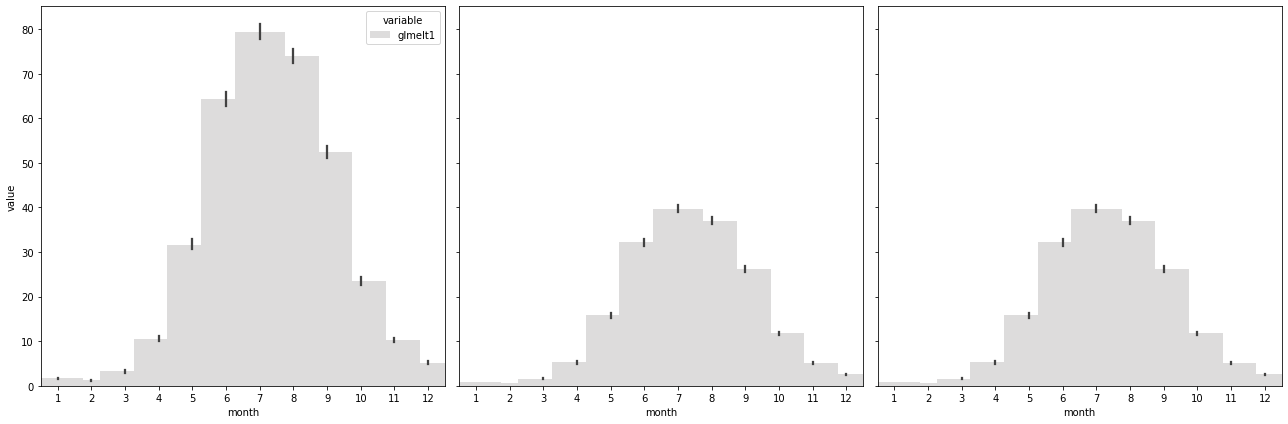

In [26]:
fig = plt.figure(figsize=(18, 6), layout='tight')
mosaic = fig.subplot_mosaic('''
                            abc
                            ''', sharey = True)


palette = 'coolwarm'


sns.barplot(data=glmelt1,  x="month", y="value", hue="variable", ax=mosaic['a'], palette = palette, dodge=True, width=1.5)
sns.barplot(data=glmelt2, x="month", y="value", hue="variable", ax=mosaic['b'], palette = palette, dodge=True, width=1.5, legend = False)
sns.barplot(data=glmelt3, x="month", y="value", hue="variable", ax=mosaic['c'], palette = palette, dodge=True, width=1.5, legend = False)


In [36]:

def group_data(data):
    grouped = (
        data.groupby(['month', 'elevation_bin', 'variable'])['value']
        .mean()
        .reset_index()
    )
    return grouped

dataframes = [glmelt1, glmelt2, glmelt3]#, combined_df4, combined_df5]

glmelt1 = group_data(glmelt1)
glmelt2 = group_data(glmelt2)
glmelt3 = group_data(glmelt3)


In [37]:
glmelt1

,month,elevation_bin,variable,value
0,1,2500 - 3000,glmelt,23.090174
1,1,3000 - 3500,glmelt,9.425999
2,1,3500 - 4000,glmelt,4.143760
3,1,4000 - 4500,glmelt,1.375020
4,1,4500 - 5000,glmelt,0.177515
...,...,...,...,...
91,12,4000 - 4500,glmelt,5.225376
92,12,4500 - 5000,glmelt,0.961982
93,12,5000 - 5500,glmelt,0.057035
94,12,5500 - 6000,glmelt,0.001995


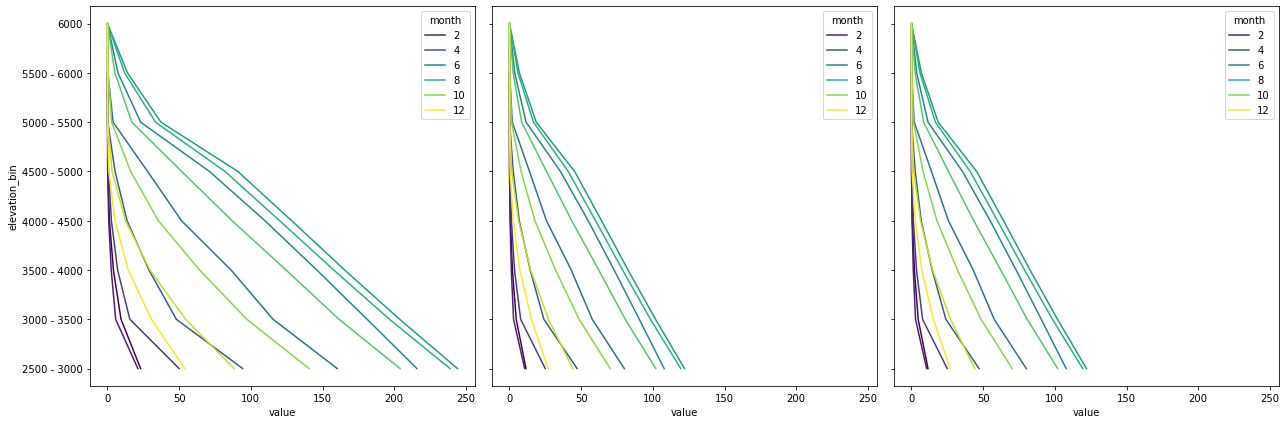

In [47]:
fig = plt.figure(figsize=(18, 6), layout='tight')
mosaic = fig.subplot_mosaic('''
                            abc
                            ''', sharey = True, sharex = True)


sns.lineplot(data = glmelt1, x = 'value', y = 'elevation_bin', hue = 'month',palette = 'viridis', ax = mosaic['a'])
sns.lineplot(data = glmelt2, x = 'value', y = 'elevation_bin', hue = 'month',palette = 'viridis', ax = mosaic['b'])
sns.lineplot(data = glmelt3, x = 'value', y = 'elevation_bin', hue = 'month',palette = 'viridis', ax = mosaic['c'])
# Invert y-axis for all plots
mosaic['a'].invert_yaxis()
mosaic['b'].invert_yaxis()
mosaic['c'].invert_yaxis()